# Week 1

## Zadanie 1

### A

In [1]:
import random

def flip():
    """ 0 - Orzeł, 1 - Reszka """
    u = random.random()
    return int(u < 0.5)

def simulation():
    """ Simulation of one game. """
    rzuty = []
    jas = [1,0,1]
    grzes = [0,1,1]
    while True:
        rzuty.append(flip())
        if rzuty[-3:] == jas:
            return 'Jas'
        elif rzuty[-3:] == grzes:
            return 'Grzes'

def monteCarlo(t = 10000):
    """ Monte Carlo simulation which count Grzes's wins in simple flip game. """
    winGrzes = 0
    for _ in range(t):
        wygrany = simulation()
        if wygrany == 'Grzes':
            winGrzes += 1
    return winGrzes/t

In [2]:
monteCarlo()

0.4976

### B

In [3]:
def bitcoinSimulation():
    """ Simulation of one game with bitcoins. """
    grzes = 100
    jas = 5
    while True:
        if grzes <= 0:
            return 'Jas'
        elif jas <= 0:
            return 'Grzes'
        
        wygrany = simulation()
        
        if wygrany == 'Grzes':
            grzes += 1
            jas -= 1
        elif wygrany == 'Jas':
            jas += 1
            grzes -= 1

def bitcoinMonteCarlo(t = 1000):
    """ Simulation whichs counts count Grzes's wins in bitcoin game. """
    winGrzes = 0
    for _ in range(t):
        wygrany = bitcoinSimulation()
        if wygrany == 'Grzes':
            winGrzes += 1
    return winGrzes/t          

Prawdopodobieństwo, że Grześ zbankrutuje wynosi:

In [4]:
1 - bitcoinMonteCarlo()

0.04400000000000004

## Zadanie 2

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def randomTest(n = 100):
    """ Generates list of random numbers. """
    return [random.random() for _ in range(n)]

def cummulativeDistribution(data, x):
    """ Counts value of empirical cummulative distribution of x. """
    return sum([1 for element in data if element < x])/len(data)

def plotECDF(data):
    dataToPlot = []
    n = len(data)
    zakres = np.linspace(1.1*min(data), 1.1*max(data), n)
    for i in zakres:
        temp = cummulativeDistribution(data, i)
        dataToPlot.append(temp)
    
    plt.scatter(zakres[1:-1], dataToPlot[:-2], s = 10, facecolors='none', edgecolors='k')
    # Wycinki wynikają z przesunięcia punktów oraz braku otwartego kółka na końcu.
    for i in range(len(dataToPlot) - 1):
        x = [zakres[i], zakres[i+1]]
        y = [dataToPlot[i], dataToPlot[i]]
        plt.plot(x,y, color = 'k')
    plt.plot(zakres[-1], dataToPlot[-1])
    plt.show()

In [6]:
data = randomTest()
cummulativeDistribution(data, 0.3)

0.24

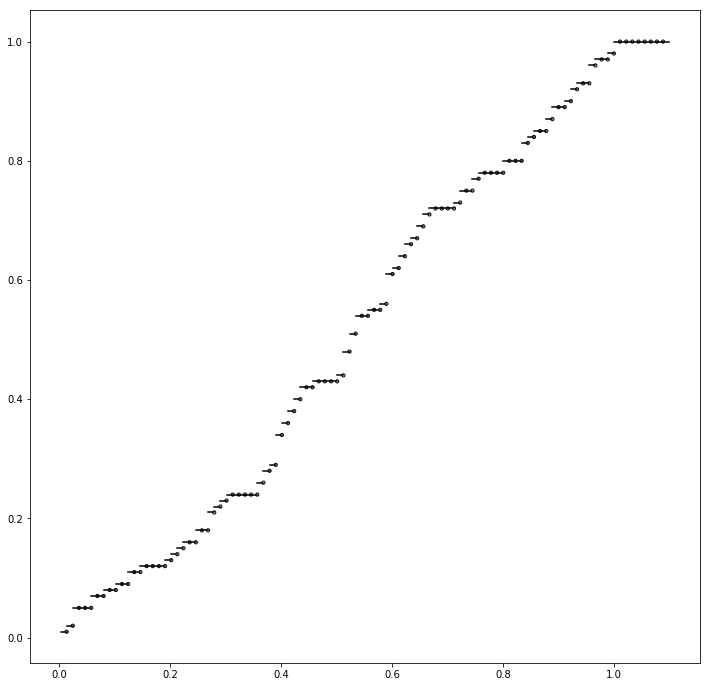

In [7]:
plt.figure(figsize = (12,12))
plotECDF(data)